## Packages

### Regular

In [2]:
# load the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ML

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.neighbors import KNeighborsClassifier

import pickle

## 1. Business and Data understanding

### Business

Customer churn in banking is when a customer closes their account and switches to another bank. Over their customer lifetime, customers generate fees on transactions, banking fees, credit cards, home loans, and personal loans. Churn is a problem, because the bank loses revenue, and it costs more to acquire a new customer than retaining an existing one.

**Objective(s):** Minimize the customer churn.

**Constraints:** Maximize revenue from existing customer and quality of bank services.

**Success Criteria**

- **Business Success Criteria**: understanding what keeps customers engaged is extremely valuable knowledge, as it can help you to develop your retention strategies. Reduce retention by 20%-30%

- **ML Success Criteria**: Achieve Silhoutte coefficient of atleast 0.6

- **Economic Success Criteria**: bank can save money on acquiring new customers.

**Proposed Plan:**
Classification of customer Churn

### Data Understanding

- RowNumber —- corresponds to the record (row) number and has no effect on the output.
- CustomerId —- contains random values and has no effect on customer leaving the bank.
- Surname —- the surname of a customer has no impact on their decision to leave the bank.
- CreditScore —- can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography —- a customer’s location can affect their decision to leave the bank.
- Gender —- it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age —- this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure —- refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance —- also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts -— refers to the number of products that a customer has purchased through the bank.
- HasCrCard —- denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember -— active customers are less likely to leave the bank.
- EstimatedSalary -— as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited —- whether or not the customer left the bank.

In [4]:
df = pd.read_csv('../../01_data/Customer-Churn-Records.csv')

df.shape

(10000, 18)

## data validation

In [6]:
df['Satisfaction Score'].unique()

array([2, 3, 5, 4, 1])

In [6]:
df[['Satisfaction Score', 'Exited']].groupby('Satisfaction Score').mean()

,Exited
Satisfaction Score,
1,0.200311
2,0.217974
3,0.196376
4,0.206175
5,0.198104


In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [9]:
df['CustomerId'].nunique()

10000

In [10]:
# confirm this with buisness person
df['Satisfaction Score'].max(), df['Satisfaction Score'].min()

(5, 1)

In [11]:
df['CreditScore'].max() # credit score highest limit in Europe

850

In [12]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
df['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

## Data cleaning

In [14]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [11]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [19]:
# categorical_columns_in_data = list(df.columns[df.dtypes == 'object'])
# categorical_columns_in_data

In [18]:
categorical_columns_in_data = ["Geography", "Gender", "HasCrCard",
    "IsActiveMember", "Exited", "Complain", "Card Type"
]

## EDA

In [20]:
df['Exited'].value_counts() / df['Exited'].shape

0    0.7962
1    0.2038
Name: Exited, dtype: float64

In [21]:
# gender is important feature: Female customers having more churn rate than male
df[['Gender', 'Exited']].groupby('Gender').mean()

,Exited
Gender,
Female,0.250715
Male,0.164743


In [22]:
# gender is important feature: Female customers having more churn rate than male
df[['Geography', 'Exited']].groupby('Geography').mean()

,Exited
Geography,
France,0.161747
Germany,0.324432
Spain,0.166734


In [23]:
df['Geography'].value_counts() / df.shape[0]

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [24]:
# this is our target variable
df['Exited'].unique()

array([1, 0])

In [26]:
for i in categorical_columns_in_data:
    if i != "Exited":
        print(i)
        print(df[[i, 'Exited']].groupby(i).mean())
        print("----------------------------------------")

Geography
             Exited
Geography          
France     0.161747
Germany    0.324432
Spain      0.166734
----------------------------------------
Gender
          Exited
Gender          
Female  0.250715
Male    0.164743
----------------------------------------
HasCrCard
             Exited
HasCrCard          
0          0.208149
1          0.201984
----------------------------------------
IsActiveMember
                  Exited
IsActiveMember          
0               0.268715
1               0.142691
----------------------------------------
Complain
            Exited
Complain          
0         0.000503
1         0.995108
----------------------------------------
Card Type
             Exited
Card Type          
DIAMOND    0.217790
GOLD       0.192646
PLATINUM   0.203607
SILVER     0.201122
----------------------------------------


In [75]:
# IsActiveMember: We don't have Enough information about this feature
# HasCrCard: Two groups has similar mean / churn rate

In [27]:
feature_drop = ['IsActiveMember', 'HasCrCard']

In [28]:
df.drop(feature_drop, axis=1, inplace=True)

In [29]:
df_processed = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [30]:
df_processed.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,79084.10,0,0,5,GOLD,425


## Feature encoding

In [31]:
LE_Gender = LabelEncoder()
LE_Geography  = LabelEncoder()
LE_Card_Type = LabelEncoder()

In [32]:
df['Gender'] = LE_Gender.fit_transform(df['Gender'])

In [33]:
df['Geography'] = LE_Geography.fit_transform(df['Geography'])

In [34]:
df['Card Type'] = LE_Card_Type.fit_transform(df['Card Type'])

In [35]:
LE_Geography.classes_

array(['France', 'Germany', 'Spain'], dtype=object)

In [36]:
LE_Gender.classes_

array(['Female', 'Male'], dtype=object)

In [37]:
LE_Card_Type.classes_

array(['DIAMOND', 'GOLD', 'PLATINUM', 'SILVER'], dtype=object)

In [94]:
# pickle.dump(LE_Geography, open("LE_Geography.sav", 'wb'))
# pickle.dump(LE_Gender, open("LE_Gender.sav", 'wb'))
# pickle.dump(LE_Card_Type, open("LE_Card_Type.sav", 'wb'))

In [38]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,101348.88,1,1,2,0,464
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,112542.58,0,1,3,0,456
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,113931.57,1,1,3,0,377
3,4,15701354,Boni,699,0,0,39,1,0.00,2,93826.63,0,0,5,1,350
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,79084.10,0,0,5,1,425


In [39]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [40]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,79084.10,0,0,5,1,425


In [41]:
df.shape

(10000, 13)

## Creating the X & y

In [42]:
X = df.drop("Exited", axis = 1)

y = df['Exited']

In [43]:
X.shape, y.shape

((10000, 12), (10000,))

In [44]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,101348.88,1,2,0,464
1,608,2,0,41,1,83807.86,1,112542.58,1,3,0,456
2,502,0,0,42,8,159660.80,3,113931.57,1,3,0,377
3,699,0,0,39,1,0.00,2,93826.63,0,5,1,350
4,850,2,0,43,2,125510.82,1,79084.10,0,5,1,425


## Train & Test Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
X_train.shape, X_test.shape

((8000, 12), (2000, 12))

## Normalizing our data

In [47]:
STD = MinMaxScaler()

In [155]:
# pickle.dump(STD, open("scaler.sav", 'wb'))

In [48]:
X_train_STD = STD.fit_transform(X_train)

In [49]:
X_test_STD = STD.transform(X_test)

## Logistic Regression

### Defining the model

In [50]:
LR = LogisticRegression()

In [51]:
# defined the set of hyper-parameters
params = {
    'C' : range(1, 5),
    'max_iter' : range(100,500,50)
}

In [52]:
grid_search = GridSearchCV(LR, params, cv=5)

In [53]:
grid_search.fit(X_train_STD, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': range(1, 5), 'max_iter': range(100, 500, 50)})

In [54]:
grid_search.best_params_

{'C': 1, 'max_iter': 100}

### Refit the model with best params

In [123]:
LR = LogisticRegression(C=1 , max_iter = 100)

In [124]:
LR.fit(X_train_STD,y_train)

LogisticRegression(C=1)

### Prediction

In [125]:
y_hat = LR.predict(X_test_STD)

In [126]:
y_hat_train = LR.predict(X_train_STD)

### Accuracy

In [129]:
print(accuracy_score(y_test,y_hat))

0.9985


In [130]:
print(accuracy_score(y_train,y_hat_train))

0.998625


In [131]:
recall_score(y_train,y_hat_train), recall_score(y_test,y_hat)

(0.9987730061349693, 0.9950980392156863)

In [133]:
# 1: left the bank, 0: not left

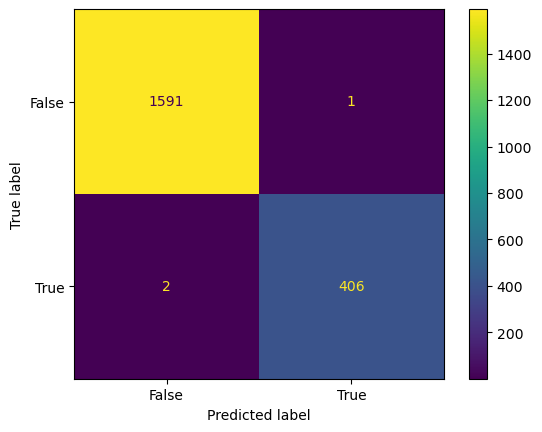

In [134]:
from sklearn import metrics


confusion_matrix = confusion_matrix(y_test, y_hat)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


In [135]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



array(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'], dtype=object)

In [153]:
pd.DataFrame({"Feature_names": STD.get_feature_names_out(), "coeff_": LR.coef_.reshape(-1, )})

,Feature_names,coeff_
0,CreditScore,0.027312
1,Geography,-0.029337
2,Gender,-0.077843
3,Age,1.579884
4,Tenure,-0.085748
5,Balance,0.165023
6,NumOfProducts,-0.285660
7,EstimatedSalary,0.060336
8,Complain,10.536151
9,Satisfaction Score,-0.218352


In [158]:
proba = LR.predict_proba(X_test_STD)[:,1]

In [162]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,79084.10,0,0,5,1,425


##  KNN

In [137]:
knn = KNeighborsClassifier()

In [138]:
params = {
    'n_neighbors' : range(1, 5)
}

In [139]:
grid_search = GridSearchCV(knn, params,cv=5)

In [140]:
grid_search.fit(X_train_STD, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 5)})

In [141]:
grid_search.best_params_

{'n_neighbors': 3}

### refitting model with best hyperparameters

In [142]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [143]:
knn.fit(X_train_STD, y_train)

KNeighborsClassifier(n_neighbors=3)

### prediction

In [144]:
y_hat = knn.predict(X_test_STD)

### Evaluation

In [145]:
print(accuracy_score(y_test,y_hat))

0.9985


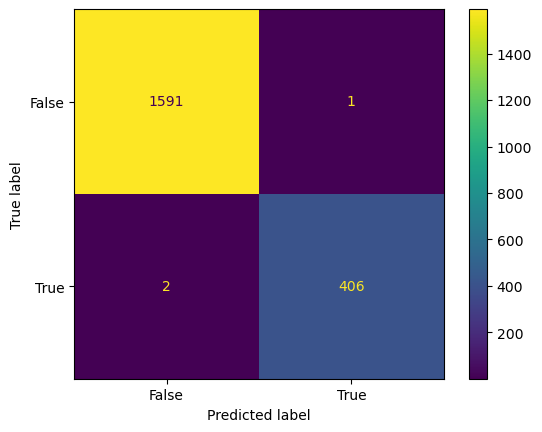

In [146]:
confusion_matrix = confusion_matrix(y_test, y_hat)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


## Saving the model in local after model selection

In [111]:
# import pickle

In [112]:
filename = "Logistic_regression_model.sav"

In [114]:
pickle.dump(LR, open(filename, 'wb'))

### 1. To convert categorical into numerical : Labelencoder
### 2. to nornalize the data we have used: Min max scaler
### 3. Logistic regression: recall